In [1]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

######################################
       Import Key Packages            
######################################


In [ ]:
df_cars = pd.read_csv('/content/drive/MyDrive/Machine learning códigos - abril/auto-mpg.csv')

In [ ]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
print("############################################")
print("          Información del Dataset ")
print("############################################")
df_cars.info()

############################################
          Información del Dataset 
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Observación:

Pudimos ver las características/columnas/campos y su tipo de datos, junto con el recuento nulo .
La característica del nombre es un tipo de objeto en el conjunto de datos dado .

**Primeras acciones:**
Remplazo (‘?’,’NaN’)
Convertir los datos “horsepower” a objetos de tipo entero (int)

In [ ]:
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)
df_cars.horsepower = df_cars.horsepower .astype(int)
print("########################################## ############################")
print(" Después de la limpieza y tipos de datos")
print("### ################################################## #################")
df_cars.info()

########################################## ############################
 Después de la limpieza y tipos de datos
### ################################################## #################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


Pudimos ver las características/columnas/campos y su tipo de datos, junto con el recuento nulo .
Los caballos de fuerza ahora son de tipo int .
El nombre sigue siendo un tipo de objeto en el conjunto de datos dado, ya que lo eliminaremos durante la fase EDA .

**Agrupaciones**
Corregir el nombre de los carros

In [ ]:
df_cars['car name'] = df_cars['car name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['car name'] = df_cars['car name'].str.replace('maxda|mazda','mazda')
df_cars['car name'] = df_cars['car name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['car name'] = df_cars['car name'].str.replace('toyota|toyouta','toyota')
df_cars['car name'] = df_cars['car name'].str.replace('vokswagen|volkswagen|vw','volkswagen')
df_cars.groupby(['car name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


**Resumen de estadísticas**
Ahora podemos comprobar las estadísticas resumidas como media, desviación estándar, percentiles, etc.



In [ ]:
display(df_cars.describe().round(2))


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


**Paso 7: lidiar con los valores perdidos**


In [ ]:
meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)#rellena con la media de los caballos de fuerza

**Asimetría y curtosis**
Curtosis: caracteriza la elevación o el achatamiento relativo de una distribución, comparada con la distribución normal

In [ ]:
print("Oblicuidad: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Oblicuidad: 0.457066
Kurtosis: -0.510781


**Variables Categoricas:** Si observa el conjunto de datos detenidamente, notará que la  característica de "origen" u origin  no es en realidad una variable continua sino una variable categórica. Por tanto, debemos tratar esas variables de una manera diferente. Hay varias formas de hacerlo. Lo que vamos a hacer aquí es reemplazar la variable categórica con valores reales.



In [ ]:
df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars.head()# ¿Que tipo de categorización es?

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


**Creación de variables ficticias**
Valores como  "Estados Unidos" o "america" no pueden leerse en una ecuación. Entonces creamos 3 columnas simples de verdadero o falso con títulos equivalentes a "¿Este automóvil es estadounidense?", "¿Es este coche europeo?" y "¿Este coche es asiático?". Estas se utilizarán como variables independientes sin imponer ningún tipo de ordenamiento entre las tres regiones. Apliquemos el siguiente código.

In [ ]:
cData = pd.get_dummies(df_cars, columns=['origin'])
cData # lo que hace es leer la columna origin y tomar de cada una y poner un false or true segun corresponda

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,ford torino,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,False,False,True
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,True,False,False


**Remoción de Columnas**
Para este análisis, no necesitaremos la función de nombre del automóvil, por lo que podemos eliminarla.


In [ ]:
df_cars = df_cars.drop('car name',axis=1)

In [ ]:
df_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


ANÁLISIS UNIVARIADO “Uni” + “Variado” = Univariado ,  es decir, análisis de una variable o característica. El análisis univariado básicamente nos dice cómo se distribuyen los datos de cada característica. solo muestra como se muestra a continuación.

<ipython-input-25-e5103f0b8c1b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df_cars["mpg"])


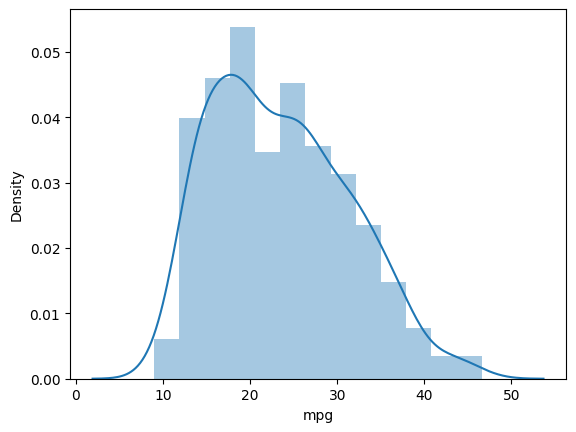

In [ ]:
sns_plot = sns.distplot(df_cars["mpg"])


**Análisis bivariado**

“Bi” + “Variada” = Bivariada, significa que dos variables o características se analizan juntas para descubrir cómo se relacionan entre sí. Generalmente, lo usamos para encontrar la relación entre las variables dependientes e independientes. Incluso usted puede realizar esto con dos variables/características cualesquiera en el conjunto de datos dado para comprender cómo se relacionan entre sí.

Aquí trazaremos un diagrama de barras para representar el recuento de automóviles fabricados por cada país. Dado que se trata de datos categóricos, los representaremos en un diagrama de barras.

<ipython-input-27-9ba60b3fab9f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


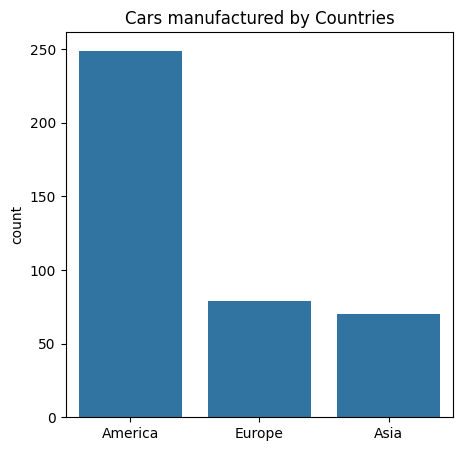

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'America'
labels[1] = 'Europe'
labels[2] = 'Asia'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

<ipython-input-28-36f83c25cb2d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cars['mpg'], ax = ax[0,1])
<ipython-input-28-36f83c25cb2d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cars['cylinders'], ax = ax[1,1])
<ipython-input-28-36f83c25cb2d>:8: UserWarning: 

`distplot` is a de

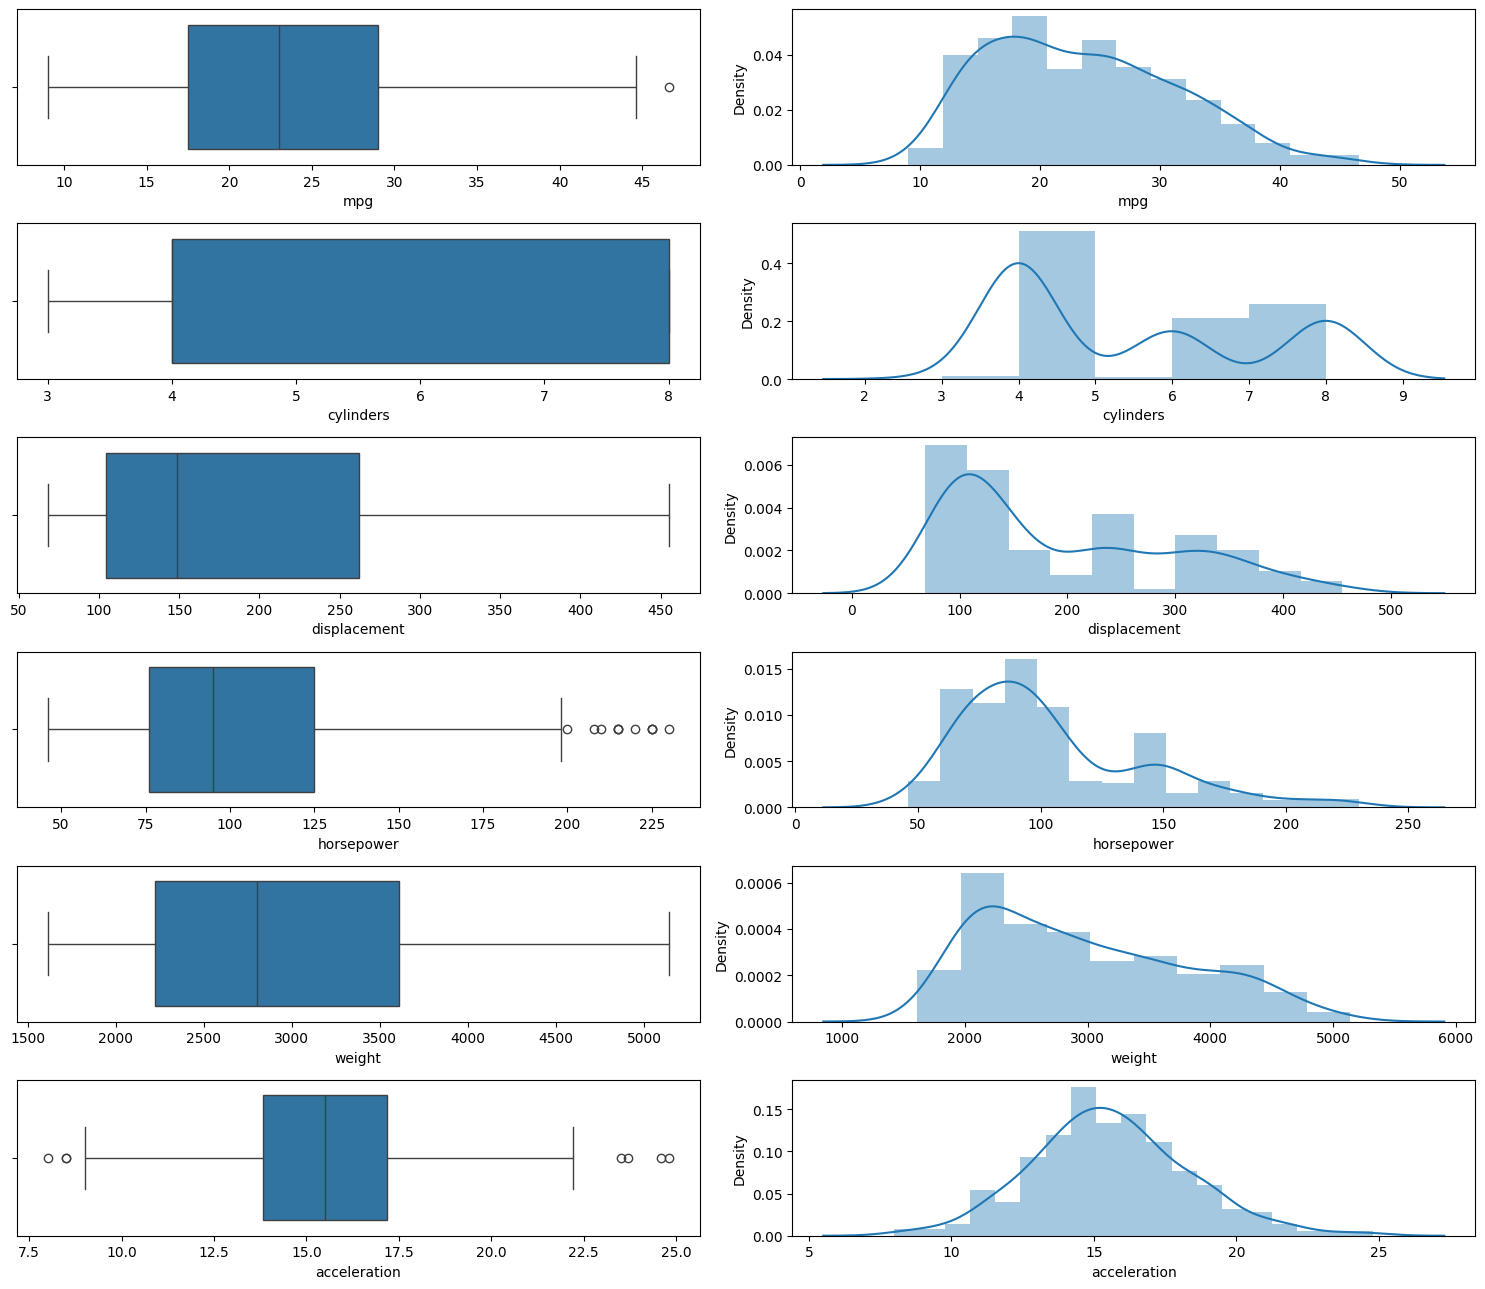

In [ ]:
# Exploring the range and distribution of numerical Variables
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
sns.distplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
sns.distplot(df_cars['cylinders'], ax = ax[1,1])
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
sns.distplot(df_cars['displacement'], ax = ax[2,1])
sns.boxplot(x= df_cars["horsepower"], ax = ax[3,0])
sns.distplot(df_cars['horsepower'], ax = ax[3,1])
sns.boxplot(x= df_cars["weight"], ax = ax[4,0])
sns.distplot(df_cars['weight'], ax = ax[4,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[5,0])
sns.distplot(df_cars['acceleration'], ax = ax[5,1])
plt.tight_layout()

KeyError: 'model_year'

<Figure size 640x480 with 0 Axes>

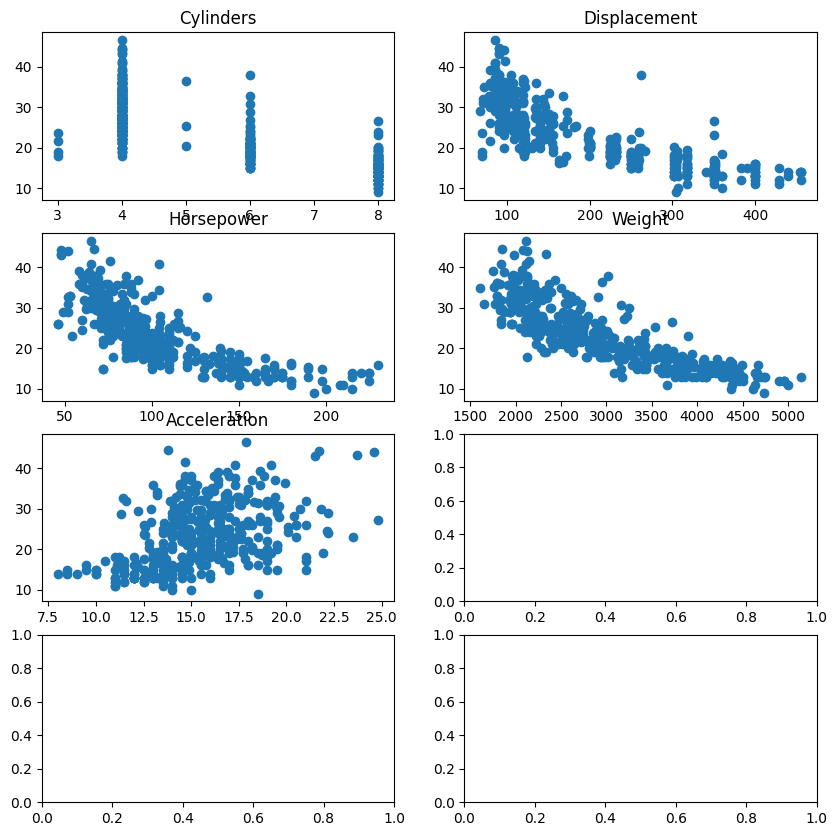

In [ ]:
#**Plot Numerical Variables**

plt.figure(1)
f,axarr = plt.subplots(4,2, figsize=(10,10))
mpgval = df_cars.mpg.values
axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model_year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

** Distribuciones de las variables/características**


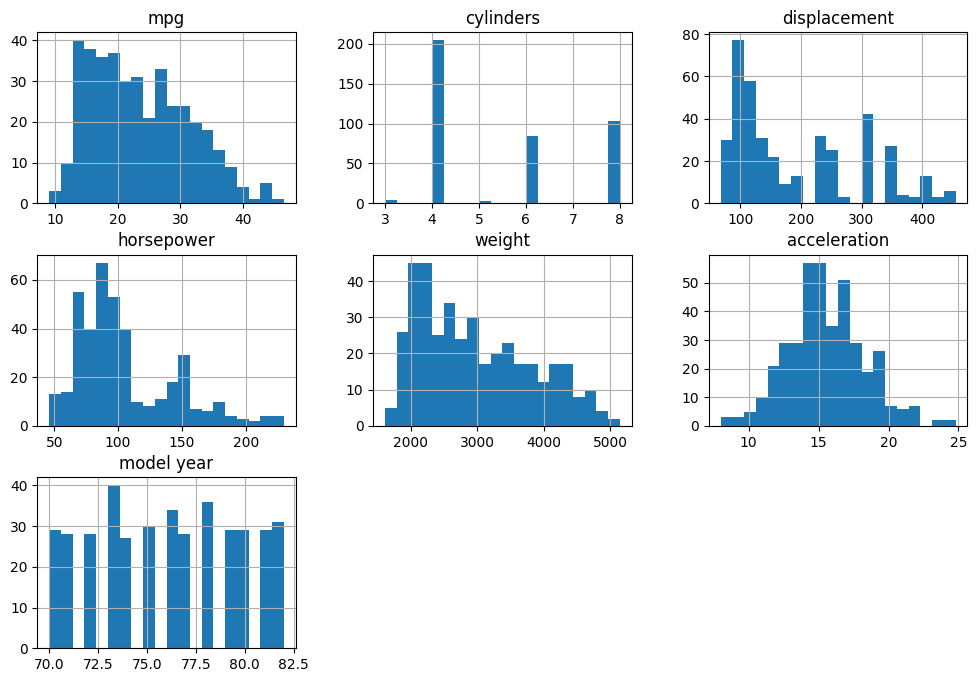

In [ ]:
df_cars.hist(figsize=(12,8),bins=20)
plt.show()

Conclusión
Confío en que haya podido comprender completamente el proceso de EDA a través de esta guía. Sin embargo, contiene muchas más funciones. Si realiza el proceso EDA de forma clara y precisa, existe una garantía del 99 % de que podrá crear su proceso de selección de modelo, ajuste de hiperparámetros e implementación de manera efectiva sin necesidad de limpiar más datos. Debe monitorear continuamente los datos y garantizar que el resultado del modelo sea sostenible para predecirlos, clasificarlos o agruparlos.

Conclusiones clave:
El análisis de datos exploratorios (EDA) es una forma de análisis para comprender los conocimientos de las características clave de varias entidades de un conjunto de datos determinado, como columnas, filas, etc.
Se realiza aplicando Pandas, NumPy, métodos estadísticos y paquetes de visualización de datos.
Los 3 tipos de análisis de datos involucrados en EDA son univariados, bivariados y multivariados.